In [36]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import time
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import warnings
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [37]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [38]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


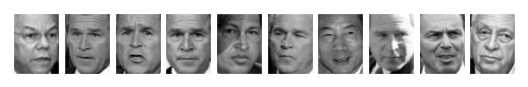

In [39]:
fig, ax = plt.subplots(1, 10, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')

In [40]:
faces.data.shape

(1348, 2914)

In [41]:
faces.target

array([1, 3, 3, ..., 7, 3, 5], dtype=int64)

In [42]:
A = faces.data.mean(axis=0)

The "mean" face

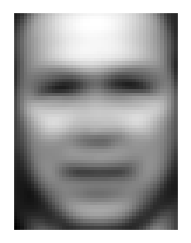

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
ax.imshow(A.reshape(62, 47), cmap='binary_r')

In [44]:
mnz = np.array(faces.data)
for i in range(faces.data.shape[0]):
    mnz[i] = mnz[i] - A
print(mnz.mean(axis=0))
print(faces.data.mean(axis=0))

[-2.7000020e-05  2.7551849e-05 -1.4568295e-05 ... -2.7614107e-05
 -1.1774057e-04  3.2843753e-05]
[ 90.95947  93.83454  99.57939 ... 118.18969 111.79438 105.83602]


In [45]:
X = mnz
Y = faces.target

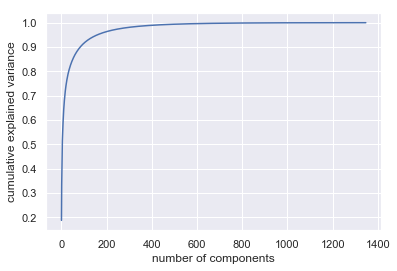

In [46]:
pca = PCA()
pca.fit(X)
arr = np.cumsum(pca.explained_variance_ratio_)
fig, ax = plt.subplots( nrows=1, ncols=1 )
plt.plot(arr)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
fig.savefig('variance.png')

In [47]:
pca.explained_variance_ratio_[0]

0.18782718

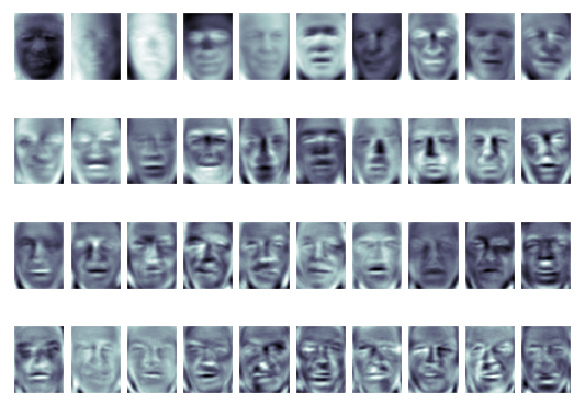

In [48]:
fig, axes = plt.subplots(4, 10, figsize=(10, 7.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for j, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[j].reshape(62, 47), cmap='bone')
fig.savefig('components.png')

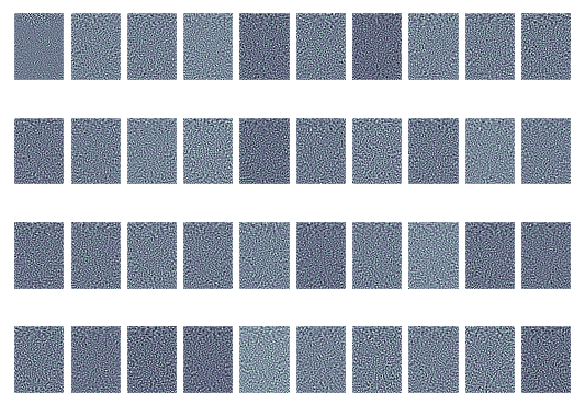

In [49]:
num = pca.components_.shape[0]
fig, axes = plt.subplots(4, 10, figsize=(10, 7.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for j, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[num -j - 1].reshape(62, 47), cmap='bone')
# fig.savefig('components.png')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.125, random_state=0)

In [51]:
X_train.shape

(1179, 2914)

In [52]:
clf = LogisticRegressionCV(cv=5, multi_class='multinomial')

In [54]:
l = [0.85, 0.90, 0.95, 0.99]
print("without using PCA")
start = time.time()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
end = time.time()
print("time consumed ", end - start, " accuracy score ", accuracy_score(pred, y_test))
print()
for i in l:
    print("retain ", i * 100, "% of the variance ")
    ncp = np.searchsorted(arr, i)
    print("component number= ", ncp)
    pca = PCA(n_components = ncp, svd_solver='randomized')
    pca.fit(X_train)
    X_train_reduce = pca.transform(X_train)
    X_test_reduce = pca.transform(X_test)
    start = time.time()
    clf.fit(X_train_reduce, y_train)
    pred = clf.predict(X_test_reduce)
    end = time.time()
    print("time consumed ", end - start, " accuracy score ", accuracy_score(pred, y_test))
    print()

without using PCA
time consumed  30.829582691192627  accuracy score  0.8106508875739645

retain  85.0 % of the variance 
component number=  51
time consumed  4.305693626403809  accuracy score  0.7337278106508875

retain  90.0 % of the variance 
component number=  83
time consumed  4.814142227172852  accuracy score  0.7514792899408284

retain  95.0 % of the variance 
component number=  159
time consumed  4.584371328353882  accuracy score  0.7810650887573964

retain  99.0 % of the variance 
component number=  412
time consumed  6.071617603302002  accuracy score  0.8165680473372781



In [ ]:
li = []
for i in range(faces.data.shape[0]):
    li.append(A)
mn_row = np.array(li)
mn_row

In [ ]:
l = [0.85, 0.90, 0.95,0.99]
fig, ax = plt.subplots(len(l) + 1, 10, figsize=(10, 7.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(len(l)):
    ncp = np.searchsorted(arr, l[i])
    pca = PCA(n_components = ncp, svd_solver='randomized')
    pca.fit(X)
    components = pca.transform(X)
    projected = mn_row + pca.inverse_transform(components)
    for j in range(10):
        ax[i, j].imshow(projected[j].reshape(62, 47), cmap='binary_r')
    
ax[len(l), 0].set_ylabel('full-dim\ninput')
for i in range(0, len(l)):
    string = str(np.searchsorted(arr, l[i])) + '-dim\nrecon'
    ax[i, 0].set_ylabel(string)
for j in range(10):
        ax[len(l), j].imshow(faces.data[j].reshape(62, 47), cmap='binary_r')
fig.savefig('faces.png')